<a href="https://colab.research.google.com/github/Skeo220/UCI-Machine-Learning-Repository/blob/main/Bank_Marketing_Prediction_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip3 install -U ucimlrepo
# https://github.com/uci-ml-repo/ucimlrepo

In [133]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [134]:
# check which datasets can be imported
# list_available_datasets()

bank_data = fetch_ucirepo(name='Bank Marketing')
features = bank_data.data.features
target = bank_data.data.targets

In [135]:
full_df = pd.concat([features, target], axis=1)

In [136]:
# shape of the data - number of rows ad columns
full_df.shape

(45211, 17)

In [124]:
# basic info about the dataset
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
# nulls in the dataset
full_df.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [37]:
full_df.duplicated().sum()

0

In [38]:
full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [11]:
# description of the numerical variables
full_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day_of_week,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# EDA
## Univariate analysis

In [63]:
# list of the numerical variables
num_vars = full_df.select_dtypes(include='int64')

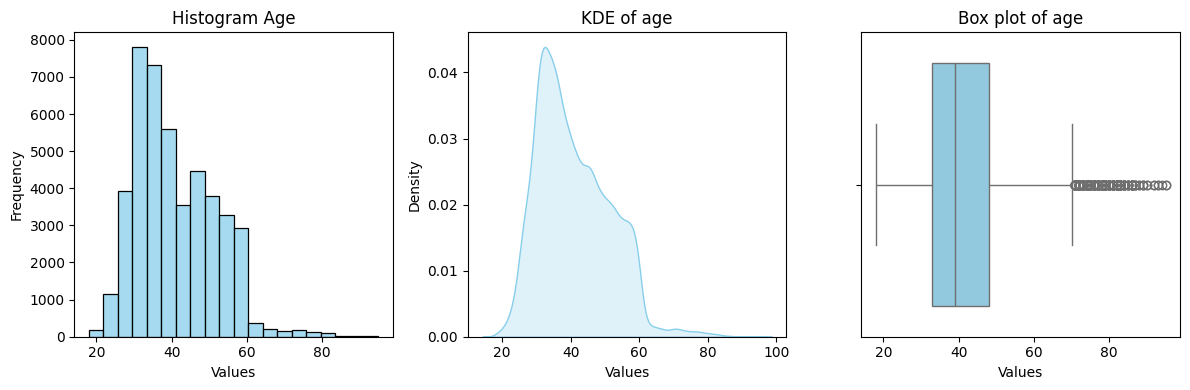

In [75]:
# histogram, kde, and box plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(num_vars['age'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram Age')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.kdeplot(num_vars['age'], color='skyblue', fill=True)
plt.title('KDE of {}'.format('age'))
plt.xlabel('Values')
plt.ylabel('Density')

# Box plot
plt.subplot(1, 3, 3)
sns.boxplot(x=num_vars['age'], color='skyblue')
plt.title('Box plot of {}'.format('age'))
plt.xlabel('Values')

plt.tight_layout()
plt.show()

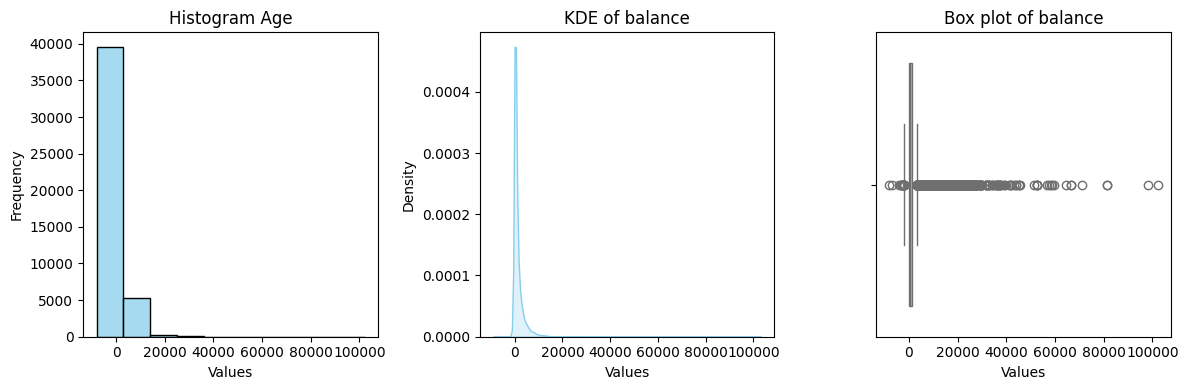

In [77]:
# histogram, kde, and box plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(num_vars['balance'], bins=10, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram Age')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.kdeplot(num_vars['balance'], color='skyblue', fill=True)
plt.title('KDE of balance')
plt.xlabel('Values')
plt.ylabel('Density')

# Box plot
plt.subplot(1, 3, 3)
sns.boxplot(x=num_vars['balance'], color='skyblue')
plt.title('Box plot of balance')
plt.xlabel('Values')

plt.tight_layout()
plt.show()

The balance is very skewed with many outliers

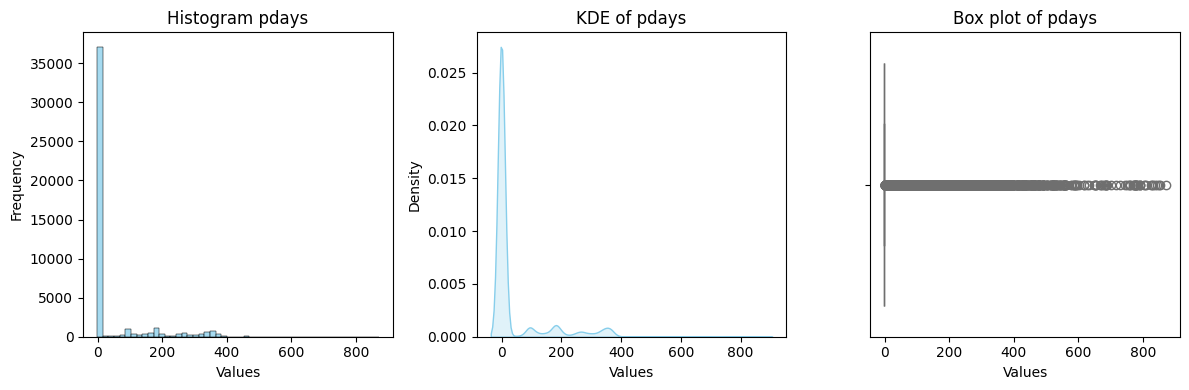

In [143]:
# histogram, kde, and box plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(num_vars['pdays'], bins=50, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram pdays')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.kdeplot(num_vars['pdays'], color='skyblue', fill=True)
plt.title('KDE of pdays')
plt.xlabel('Values')
plt.ylabel('Density')

# Box plot
plt.subplot(1, 3, 3)
sns.boxplot(x=num_vars['pdays'], color='skyblue')
plt.title('Box plot of pdays')
plt.xlabel('Values')

plt.tight_layout()
plt.show()

In [150]:
# Calculate value counts of the 'pdays' column
pdays_value_counts = full_df['pdays'].value_counts()

# Filter value counts to retain only those with counts greater than 100
filtered_pdays_index = pdays_value_counts[pdays_value_counts > 100].index

# Filter the full_df DataFrame based on the filtered index
filtered_full_df = full_df[full_df['pdays'].isin(filtered_pdays_index)]

# Display value counts of the filtered DataFrame
print(filtered_full_df['pdays'].value_counts())

-1      36954
 182      167
 92       147
 91       126
 183      126
 181      117
Name: pdays, dtype: int64


In [152]:
# Filter the full_df DataFrame where 'pdays' equals 0
filtered_full_df = full_df[full_df['pdays'] == 0]

# Display value counts of the 'pdays' column in the filtered DataFrame
print(filtered_full_df['pdays'].value_counts())

Series([], Name: pdays, dtype: int64)


In [64]:
num_vars.columns

Index(['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

We want to see the histogram charts

In [23]:
# categorical variables
cat_vars = full_df.select_dtypes(include='object')

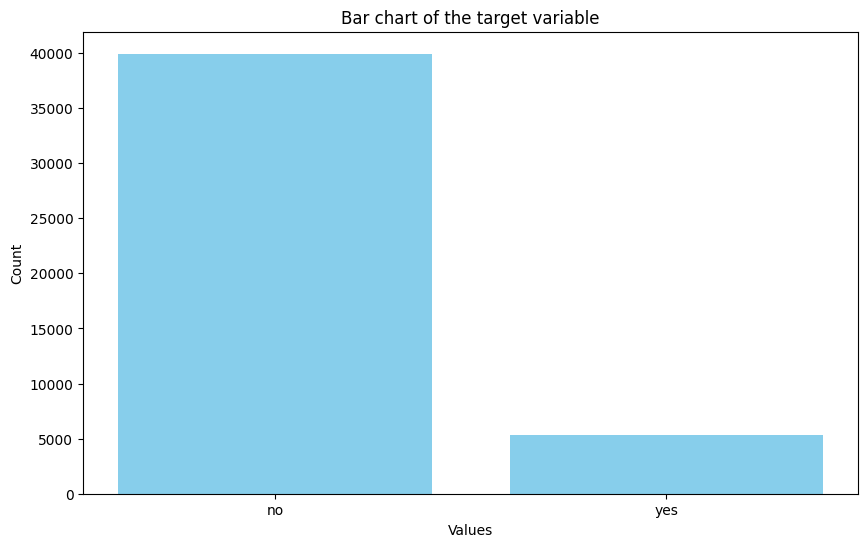

In [78]:
# target 'y' variable
values, count = full_df['y'].value_counts().index, full_df['y'].value_counts().values

plt.figure(figsize=(10,6))
plt.bar(values, count, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Bar chart of the target variable')

plt.show()

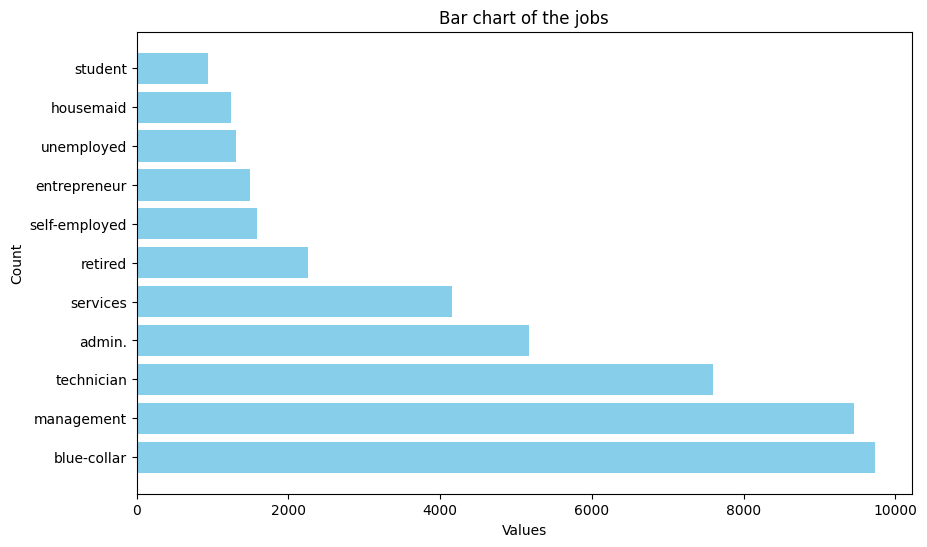

In [81]:
# job variable
values, count = full_df['job'].value_counts().index, full_df['job'].value_counts().values

plt.figure(figsize=(10,6))
plt.barh(values, count, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Bar chart of the jobs')

plt.show()

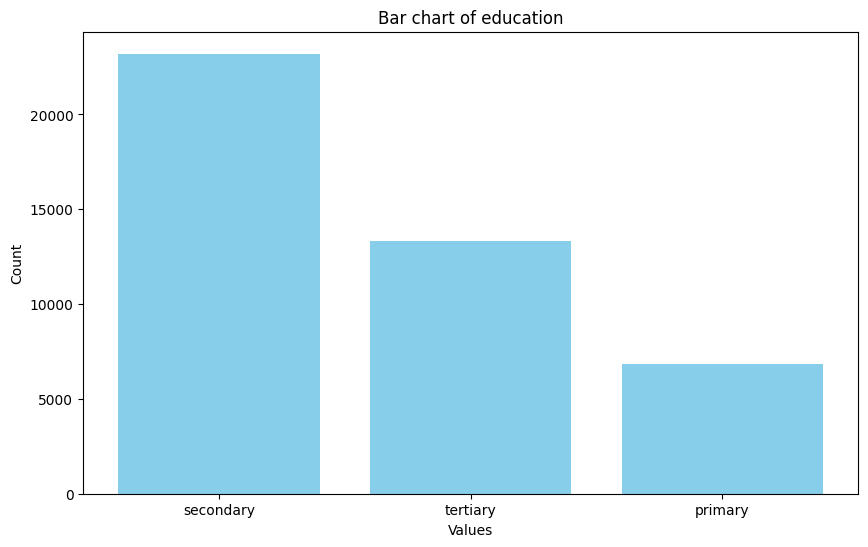

In [83]:
# job variable
values, count = full_df['education'].value_counts().index, full_df['education'].value_counts().values

plt.figure(figsize=(10,6))
plt.bar(values, count, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Bar chart of education')

plt.show()

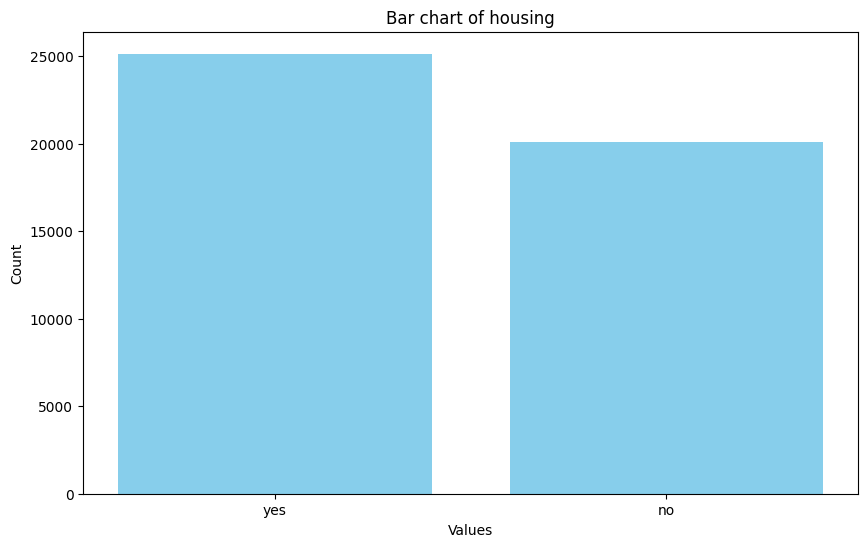

In [84]:
# housing variable
values, count = full_df['housing'].value_counts().index, full_df['housing'].value_counts().values

plt.figure(figsize=(10,6))
plt.bar(values, count, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Bar chart of housing')

plt.show()

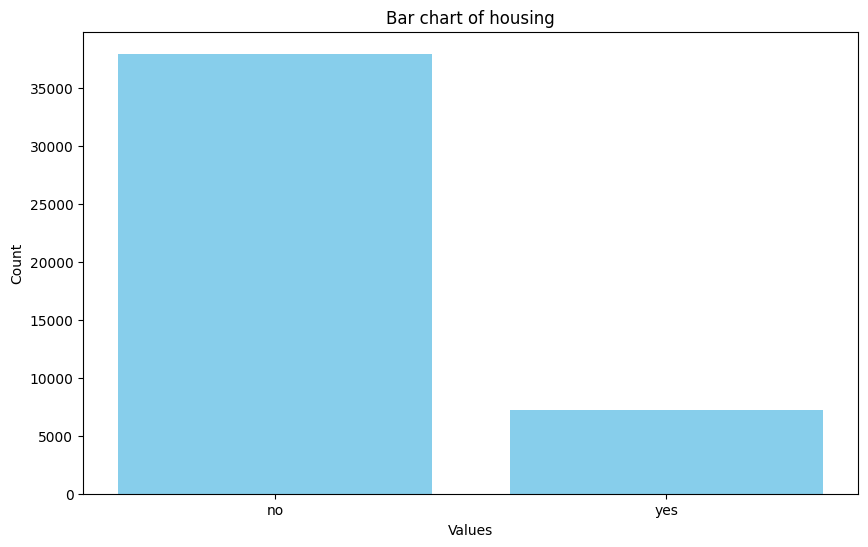

In [85]:
# job variable
values, count = full_df['loan'].value_counts().index, full_df['loan'].value_counts().values

plt.figure(figsize=(10,6))
plt.bar(values, count, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Bar chart of housing')

plt.show()

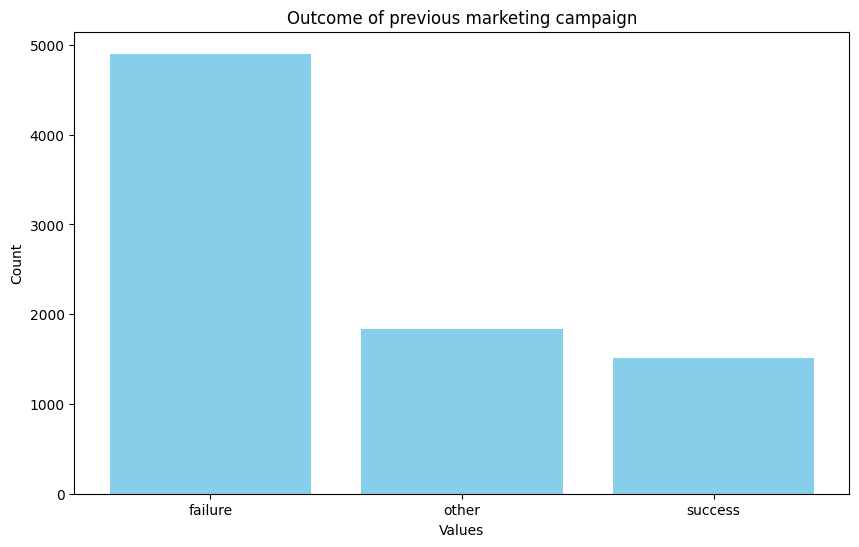

In [87]:
# job variable
values, count = full_df['poutcome'].value_counts().index, full_df['poutcome'].value_counts().values

plt.figure(figsize=(10,6))
plt.bar(values, count, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Outcome of previous marketing campaign')

plt.show()

In [91]:
# the null count for this variable is very high
full_df['poutcome'].isna().sum()

36959

In [30]:
cat_vars.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

There is significant class imbalance which might affect the performance of our model.

## Bivariate Analysis
Understanding the relationship between each variable and the target

In [ ]:
full_df.isna().sum()

We are gonna look at job, education, contact, poutcome

<Figure size 1000x600 with 0 Axes>

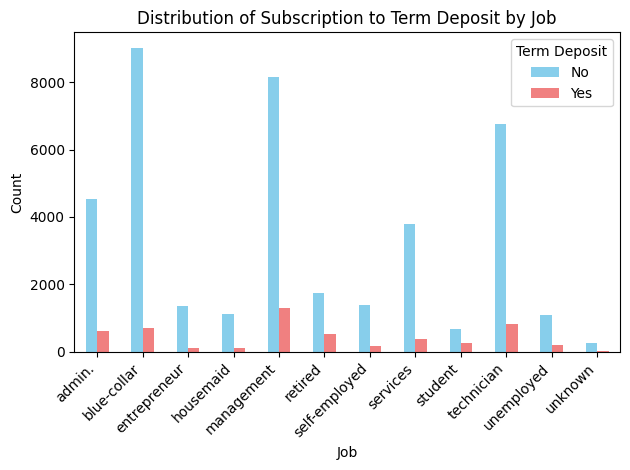

In [100]:
# Jobs
# Replace null values with 'unknown'
full_df['job'].fillna('unknown', inplace=True)

# Group data by 'job' and 'y', and count occurrences
job_y_counts = full_df.groupby(['job', 'y']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
job_y_counts.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Distribution of Subscription to Term Deposit by Job')
plt.legend(title='Term Deposit', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

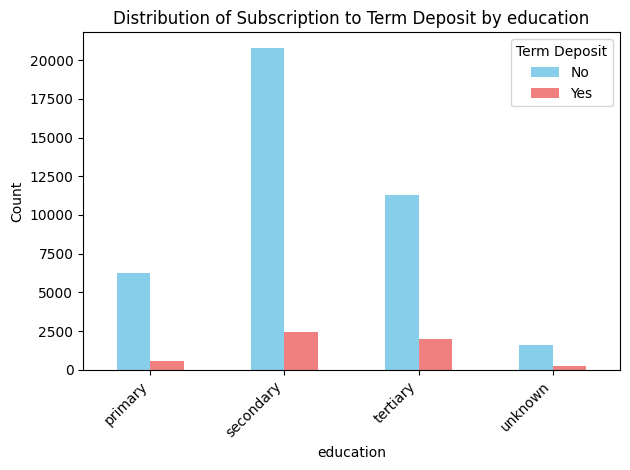

In [101]:
# education
# Replace null values with 'unknown'
full_df['education'].fillna('unknown', inplace=True)

# Replace null values with 'unknown'
full_df['education'].fillna('unknown', inplace=True)

# Group data by 'job' and 'y', and count occurrences
job_y_counts = full_df.groupby(['education', 'y']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
job_y_counts.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Distribution of Subscription to Term Deposit by education')
plt.legend(title='Term Deposit', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

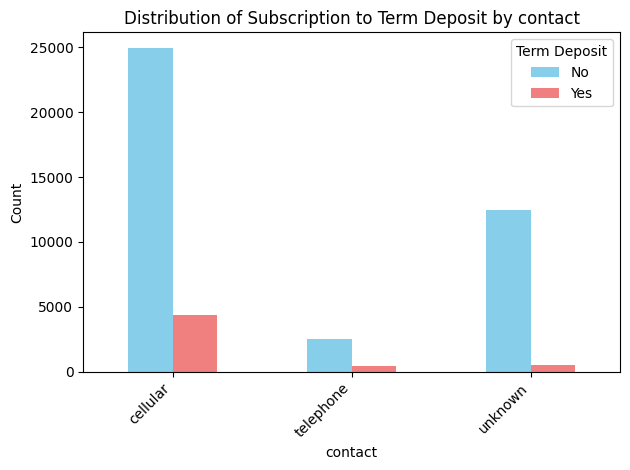

In [102]:
# education
# Replace null values with 'unknown'
full_df['contact'].fillna('unknown', inplace=True)

# Replace null values with 'unknown'
full_df['contact'].fillna('unknown', inplace=True)

# Group data by 'job' and 'y', and count occurrences
job_y_counts = full_df.groupby(['contact', 'y']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
job_y_counts.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])
plt.xlabel('contact')
plt.ylabel('Count')
plt.title('Distribution of Subscription to Term Deposit by contact')
plt.legend(title='Term Deposit', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

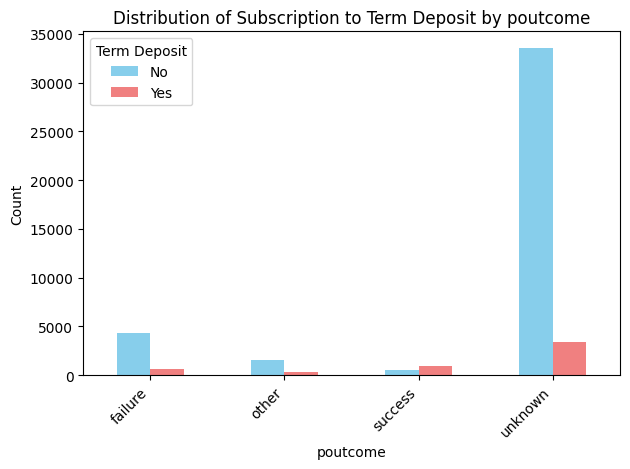

In [103]:
# education
# Replace null values with 'unknown'
full_df['poutcome'].fillna('unknown', inplace=True)

# Replace null values with 'unknown'
full_df['poutcome'].fillna('unknown', inplace=True)

# Group data by 'job' and 'y', and count occurrences
job_y_counts = full_df.groupby(['poutcome', 'y']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
job_y_counts.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.title('Distribution of Subscription to Term Deposit by poutcome')
plt.legend(title='Term Deposit', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Let's impute values in the columns where we have null values. Since we already have column imbalance we can see if this helps.

# Multivariate analysis

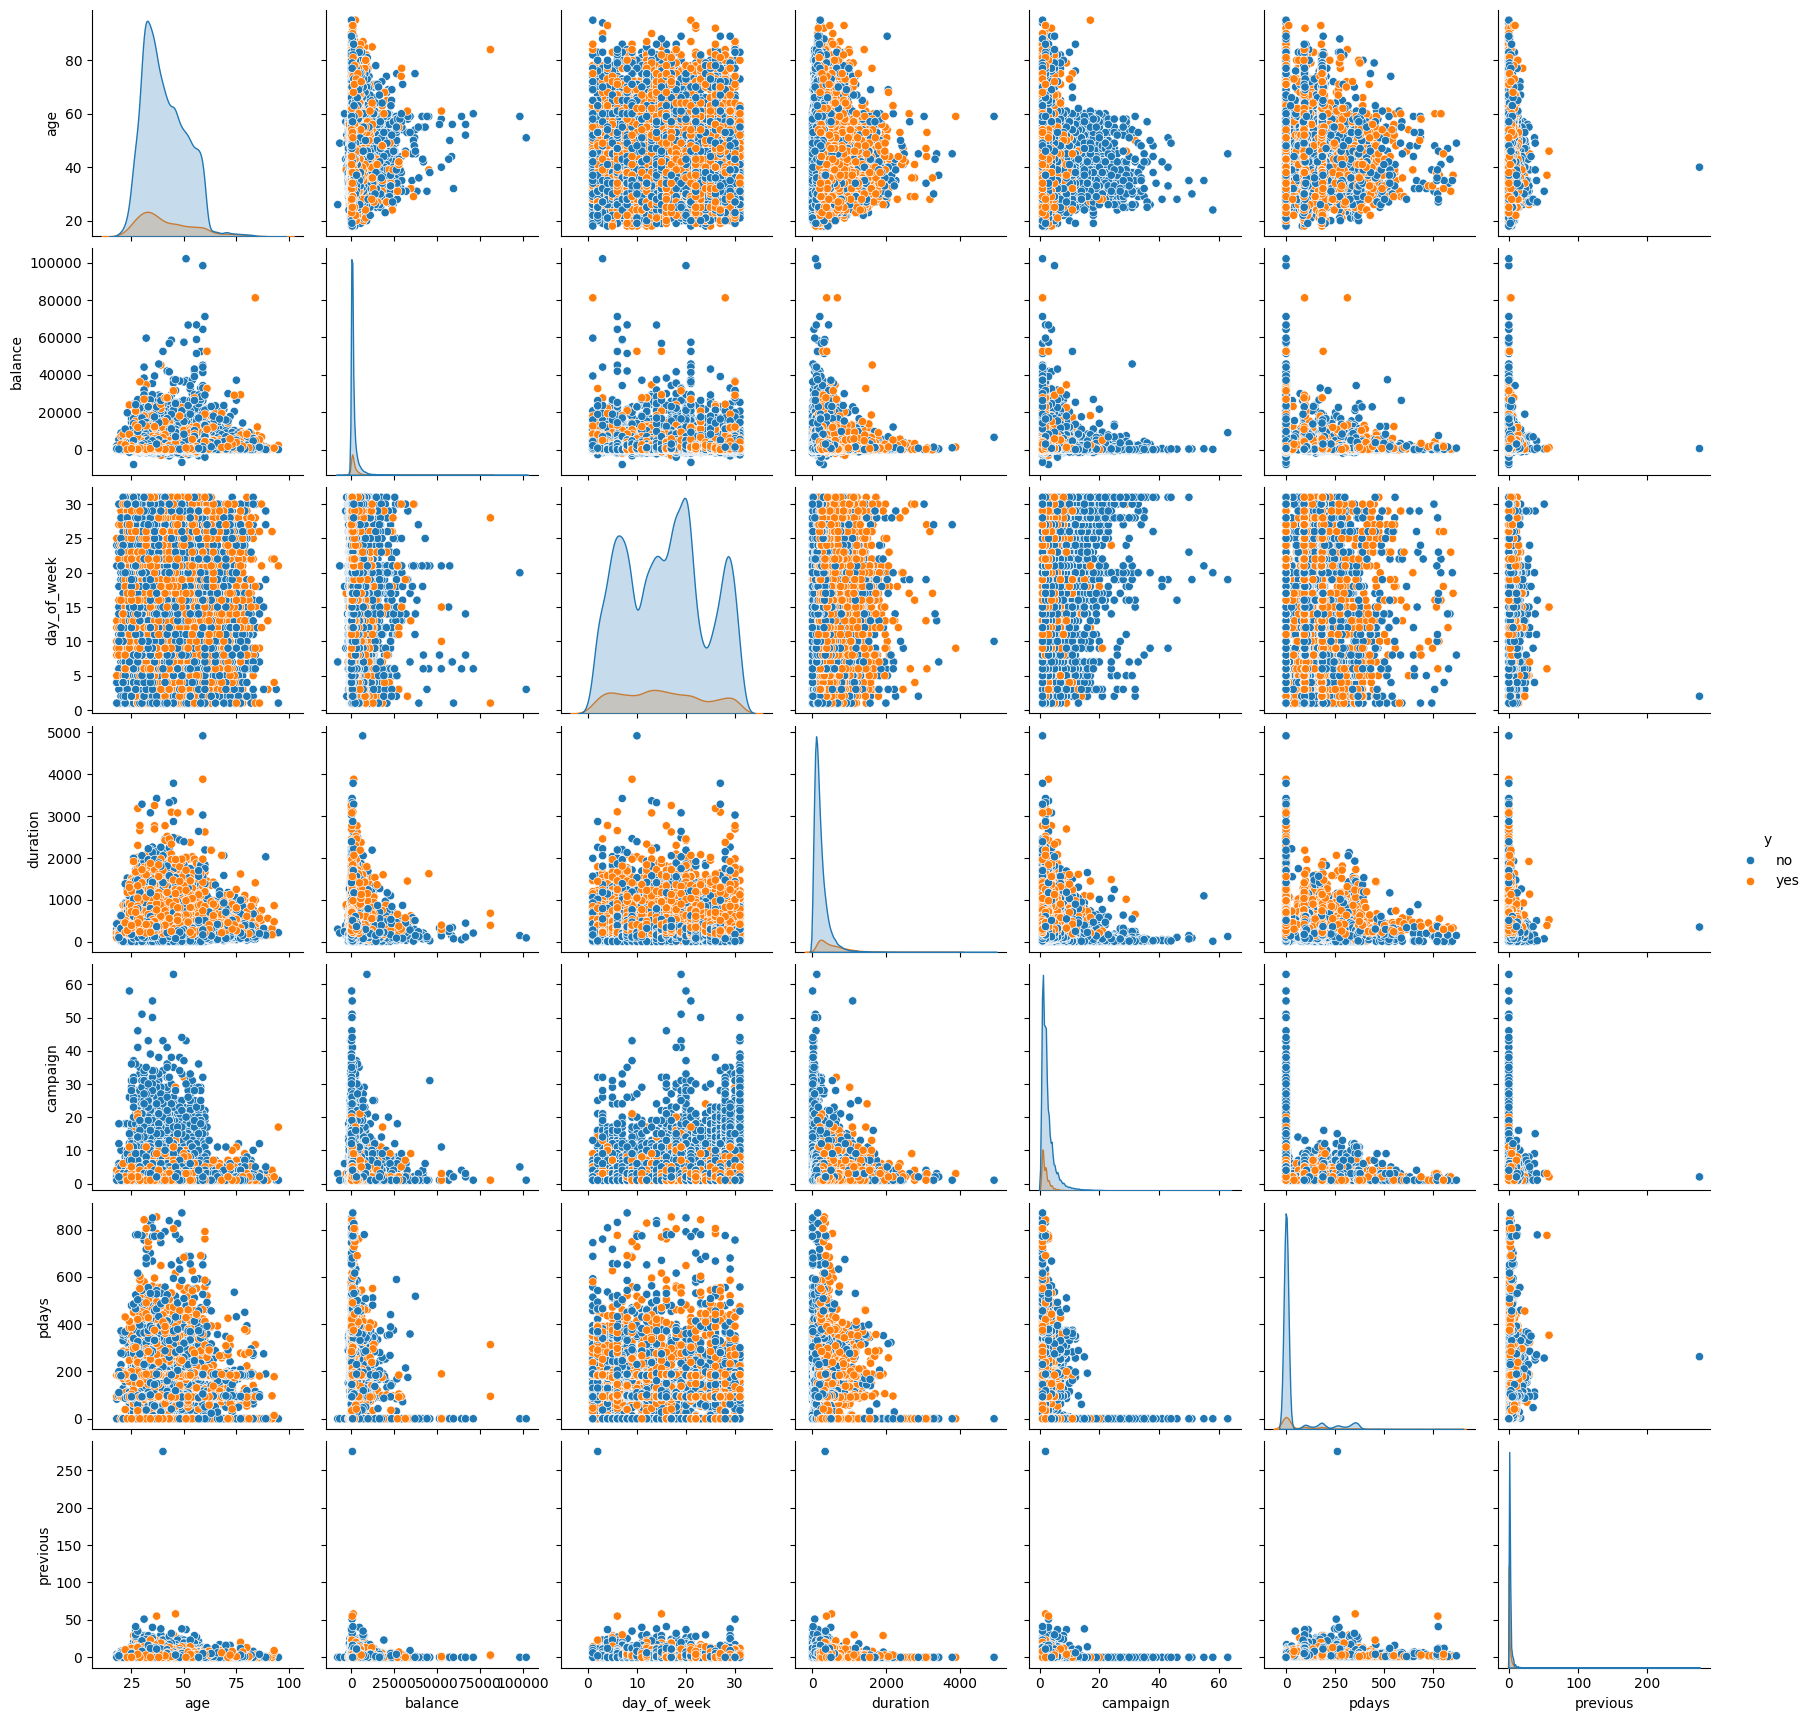

In [94]:
# correlation
sns.pairplot(full_df, vars=num_vars.columns, hue='y')

<Axes: >

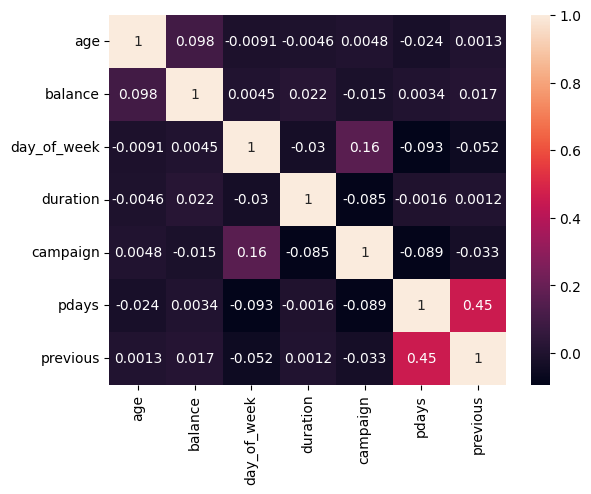

In [96]:
num_vars_corr = num_vars.dropna().corr()
sns.heatmap(num_vars_corr, annot=True)

# Feature Engineering

In [137]:
full_df['job'].fillna('unknown', inplace=True)
full_df['education'].fillna('unknown', inplace=True)
full_df['contact'].fillna('unknown', inplace=True)
full_df['poutcome'].fillna('unknown', inplace=True)

In [138]:
full_df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [159]:
# Define the time intervals
time_intervals = [-1, 30, 60, 90, 120, 150, float('inf')]  # You can adjust the intervals as needed

# Define labels for the intervals
interval_labels = ['Not contacted', 'Within 30 days', '31-60 days', '61-90 days', '91-120 days', '121-150 days']

# Create a new column with the time intervals
full_df['pdays_interval'] = pd.cut(full_df['pdays'], bins=time_intervals, labels=interval_labels, right=False)

# Display the DataFrame with the new column
full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,pdays_interval
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Not contacted
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Not contacted
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Not contacted
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Not contacted
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Not contacted


In [160]:
# List of categorical variables to be one-hot encoded
cat_vars = ['job', 'marital', 'contact','education', 'default', 'housing', 'loan', 'month', 'poutcome', 'pdays_interval']

# One-hot encode each categorical variable
one_hot_encoded = pd.get_dummies(full_df[cat_vars])

# Concatenate the one-hot encoded variables with the original DataFrame
full_df_encoded = pd.concat([full_df, one_hot_encoded], axis=1)

# Drop the original categorical variables since they are now one-hot encoded
full_df_encoded.drop(columns=cat_vars, inplace=True)

In [161]:
full_df_encoded.head()

,age,balance,day_of_week,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,pdays_interval_Not contacted,pdays_interval_Within 30 days,pdays_interval_31-60 days,pdays_interval_61-90 days,pdays_interval_91-120 days,pdays_interval_121-150 days
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,0,1,1,0,0,0,0,0
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,0,1,1,0,0,0,0,0
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,0,1,1,0,0,0,0,0
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,0,1,1,0,0,0,0,0
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,0,1,1,0,0,0,0,0


In [164]:
full_df_encoded.drop('pdays',axis=1)

,age,balance,day_of_week,duration,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,pdays_interval_Not contacted,pdays_interval_Within 30 days,pdays_interval_31-60 days,pdays_interval_61-90 days,pdays_interval_91-120 days,pdays_interval_121-150 days
0,58,2143,5,261,1,0,no,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,44,29,5,151,1,0,no,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,33,2,5,76,1,0,no,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,47,1506,5,92,1,0,no,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,33,1,5,198,1,0,no,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,0,yes,0,0,0,...,0,0,0,1,1,0,0,0,0,0
45207,71,1729,17,456,2,0,yes,0,0,0,...,0,0,0,1,1,0,0,0,0,0
45208,72,5715,17,1127,5,3,yes,0,0,0,...,0,0,1,0,0,0,0,0,0,1
45209,57,668,17,508,4,0,no,0,1,0,...,0,0,0,1,1,0,0,0,0,0


# Modeling

In [40]:
full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
